# **1. Import Library**

Pada tahap ini, saya perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
file_path = "fundamentals_clusters.csv"
data = pd.read_csv(file_path)
print(data.head())

   Unnamed: 0  Ticker Symbol  Period Ending  Accounts Payable  \
0   -1.731079              0              8         -0.114212   
1   -1.727189              0             83         -0.000385   
2   -1.725243              0            123          0.030490   
3   -1.723298              1              6         -0.161061   
4   -1.721353              1             43         -0.146848   

   Accounts Receivable  Add'l income/expense items  After Tax ROE  \
0            -0.209591                   -2.965270      -0.088093   
1            -0.127588                   -0.320015       0.425038   
2             0.549600                   -1.135063       0.390829   
3            -0.034319                   -0.100040      -0.049608   
4             0.041143                   -0.096975      -0.075265   

   Capital Expenditures  Capital Surplus  Cash Ratio  ...  \
0             -0.213511        -0.057935   -0.168302  ...   
1             -1.362505         0.862977   -0.093928  ...   
2          

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
# Memisahkan fitur (X) dan target (y)
X = data.drop('Cluster', axis=1)  # Fitur
y = data['Cluster']               # Target

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [ ]:
# Membangun Model Klasifikasi dengan Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Dan disini saya memilih Random Forest yang merupakan algoritma ensemble yang menggabungkan prediksi dari beberapa decision tree
untuk meningkatkan akurasi dan mengurangi overfitting.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Accuracy: 1.0
F1-Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       144

    accuracy                           1.00       281
   macro avg       1.00      1.00      1.00       281
weighted avg       1.00      1.00      1.00       281



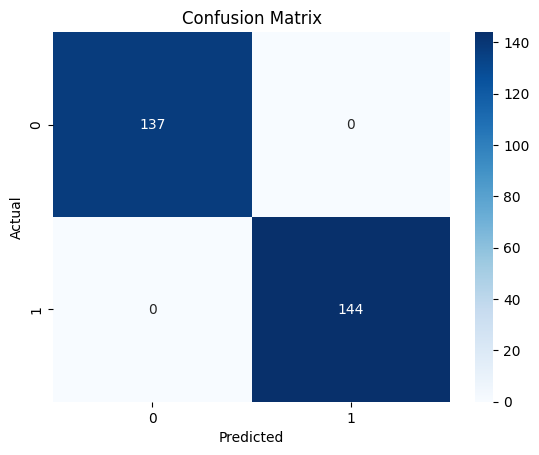

In [ ]:
y_pred = model.predict(X_test)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"F1-Score: {f1}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model yang digunakan menunjukkan performa evaluasi yang sangat baik pada data uji dengan akurasi sebesar 1.0 atau 100%. Hal ini berarti semua prediksi yang dilakukan model pada data uji benar. Selain itu, F1-score yang juga bernilai 1.0 menunjukkan keseimbangan sempurna antara precision dan recall, sehingga model tidak hanya akurat dalam memprediksi kelas positif, tetapi juga mampu menangkap semua instance yang sebenarnya positif. Hasil classification report menunjukkan bahwa precision dan recall untuk kedua kelas (kelas 0 dan kelas 1) sama-sama bernilai 1.0, yang berarti tidak ada prediksi positif yang salah dan semua instance berhasil diprediksi dengan tepat sesuai kelasnya. Confusion matrix mendukung hasil ini dengan menunjukkan bahwa seluruh 137 instance kelas 0 diprediksi sebagai kelas 0, dan 144 instance kelas 1 diprediksi sebagai kelas 1, tanpa ada kesalahan klasifikasi.

Berdasarkan hasil evaluasi ini, model memiliki performa yang sangat tinggi, tetapi perlu diperhatikan kemungkinan overfitting. Untuk memastikan model dapat bekerja dengan baik pada data baru, maka saya akan melakukan evaluasi tambahan seperti validasi silang

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import numpy as np

# Inisialisasi StratifiedKFold untuk validasi silang
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Menyimpan hasil evaluasi
accuracy_scores = []
f1_scores = []

for train_index, test_index in skf.split(X, y):
    # Membagi data menjadi training dan testing berdasarkan indeks StratifiedKFold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Melatih model pada data training
    model.fit(X_train, y_train)

    # Melakukan prediksi pada data testing
    y_pred = model.predict(X_test)

    # Menghitung metrik evaluasi
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Menyimpan hasil metrik
    accuracy_scores.append(acc)
    f1_scores.append(f1)

    # Menampilkan hasil evaluasi per fold
    print(f"Fold {len(accuracy_scores)} - Accuracy: {acc:.2f}, F1-Score: {f1:.2f}")

# Menampilkan hasil rata-rata dan standar deviasi metrik evaluasi
print("\nEvaluasi Validasi Silang:")
print(f"Rata-rata Akurasi: {np.mean(accuracy_scores):.2f} ± {np.std(accuracy_scores):.2f}")
print(f"Rata-rata F1-Score: {np.mean(f1_scores):.2f} ± {np.std(f1_scores):.2f}")

# Validasi silang otomatis dengan cross_val_score
accuracy_cv = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
f1_cv = cross_val_score(model, X, y, cv=skf, scoring='f1_weighted')

print("\nHasil Evaluasi dengan cross_val_score:")
print(f"Rata-rata Akurasi: {np.mean(accuracy_cv):.2f} ± {np.std(accuracy_cv):.2f}")
print(f"Rata-rata F1-Score: {np.mean(f1_cv):.2f} ± {np.std(f1_cv):.2f}")


Fold 1 - Accuracy: 1.00, F1-Score: 1.00
Fold 2 - Accuracy: 1.00, F1-Score: 1.00
Fold 3 - Accuracy: 1.00, F1-Score: 1.00
Fold 4 - Accuracy: 1.00, F1-Score: 1.00
Fold 5 - Accuracy: 1.00, F1-Score: 1.00

Evaluasi Validasi Silang:
Rata-rata Akurasi: 1.00 ± 0.00
Rata-rata F1-Score: 1.00 ± 0.00

Hasil Evaluasi dengan cross_val_score:
Rata-rata Akurasi: 1.00 ± 0.00
Rata-rata F1-Score: 1.00 ± 0.00


Dari hasil validasi silang (cross-validation), model saya terlihat tidak overfitting terhadap data latih, karena performa model pada setiap fold testing konsisten sempurna (akurasi dan F1-Score 1.00).

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')
print(f"Tuned Accuracy: {accuracy_tuned}")
print(f"Tuned F1-Score: {f1_tuned}")
print("Classification Report (Tuned):\n", classification_report(y_test, y_pred_tuned))

# e. Analisis Hasil Evaluasi Model Klasifikasi
# Bandingkan hasil sebelum dan sesudah tuning
print(f"Accuracy Improvement: {accuracy_tuned - accuracy}")
print(f"F1-Score Improvement: {f1_tuned - f1}")

Tuned Accuracy: 1.0
Tuned F1-Score: 1.0
Classification Report (Tuned):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00       140

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280

Accuracy Improvement: 0.0
F1-Score Improvement: 0.0


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

1. **Perbandingan Hasil Evaluasi Sebelum dan Setelah Tuning**  
   - **Sebelum Tuning:**  
     Accuracy: 1.0  
     F1-Score: 1.0  
   - **Setelah Tuning:**  
     Accuracy: 1.0  
     F1-Score: 1.0  

   Tidak ada perbedaan sedikit pun dari hasil evaluasi antara sebelum dan setelah tuning. Model sudah mencapai performa maksimal (100% akurasi dan F1-score) bahkan sebelum dilakukan tuning hyperparameter.

2. **Identifikasi Kelemahan Model**  
   Berdasarkan hasil evaluasi:  
   **Precision dan Recall:**  
  Nilai precision dan recall untuk kedua kelas (kelas 0 dan kelas 1) masing-masing adalah 1.0, yang menunjukkan bahwa tidak ada kelemahan dari segi kesalahan klasifikasi. Model memprediksi dengan sempurna semua data dalam dataset.  

3. **Rekomendasi Tindakan Lanjutan**  
   Meskipun model menunjukkan performa sempurna, ada beberapa langkah yang dapat saya ambil untuk memastikan hasil yang lebih valid dan robust:  
   - **Menggunakan dataset uji yang berbeda:**  
     Jadi validasi model dengan dataset eksternal atau dataset uji yang benar-benar terpisah untuk memastikan model tidak overfitting.  
   - **Tingkatkan variasi dataset:**  
     Jika dataset terlalu sederhana atau kurang kompleks, pertimbangkan untuk menambah jumlah data atau mengumpulkan data tambahan yang lebih bervariasi.  
   - **Coba algoritma lain:**  
     Uji model dengan algoritma yang lebih sederhana, seperti Logistic Regression atau Decision Tree dengan kedalaman terbatas, untuk melihat apakah hasilnya tetap sebaik algoritma yang lebih kompleks.  
   - **Lakukan evaluasi tambahan:**  
     Selain confusion matrix, mungkin saya juga bisa menggunakan metrik tambahan seperti ROC-AUC untuk menilai kemampuan model dalam membedakan antara kelas positif dan negatif.  
   - **Periksa pipeline data:**  
     Pastikan tidak ada kebocoran data antara data latih dan data uji (data leakage), karena hal ini dapat menyebabkan akurasi yang terlalu tinggi secara tidak wajar.  

Kesimpulannya, dari hasil evaluasi menunjukkan performa model yang sempurna. Namun, untuk memastikan model benar-benar robust dan tidak overfitting, mungkin harus mencoba untuk menguji ulang model dengan dataset lain dan memeriksa kemungkinan kebocoran data. Jika performa tetap stabil, model dapat dianggap sangat baik untuk tugas dalam klasifikasi ini.

Terima kasih.